# 2. Visualize results of stochastic simulation

In [1]:
import sys
if '/' in sys.path[0]:
    sys.path.append('/home/elisa/PycharmProjects/gempy')
elif '\\' in sys.path[0]:
    sys.path.append('C:\\users\\elisa\\documents\\git\\gempy')

In [2]:
#import warnings
#warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pn
#import mplstereonet
import gempy as gp
from matplotlib.ticker import FixedFormatter, FixedLocator
from gempy.plot import helpers
import matplotlib.colors as mcolors

C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implemen

Active grids: ['regular']
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  5.        ,   5.        ,   5.        ],
       [  5.        ,   5.        ,  15.        ],
       [  5.        ,   5.        ,  25.        ],
       ...,
       [975.        , 995.        , 906.70045601],
       [985.        , 995.        , 900.20778299],
       [995.        , 995.        , 893.70850502]])

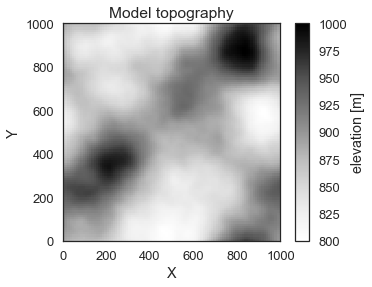

In [3]:
mode = '3Dblock'
# I subdivide into map and 3d block because otherwhise the arrays become too big
# which results in a memory error

if mode == '3Dblock':
    resolution = [100,100,100]
elif mode == 'map':
    resolution = [5,5,5]
    
geo_model = gp.create_model('simplemodel')
# to speed up the computation, the 3d resolution is pretty low here.
# for comparison, use 2d slice of section s1 and topography.
gp.init_data(geo_model, extent=[0,1000,0,1000,0,1000],resolution = resolution,
                         path_i = "faultuncertainty_interfaces_surface.csv",
                         path_o = "faultuncertainty_orient_surface.csv")

gp.map_series_to_surfaces(geo_model, {'fault_series':'fault','form_series':('layer2','layer1','basement')})
geo_model.surfaces.colors.change_colors({'layer1': '#ffbe00', 'layer2': '#9f0052', 'fault': '#015482',
                                        'basement': '#728f02'})

geo_model.set_is_fault(['fault_series'],change_color=False)

if mode == 'map':
    geo_model.grid.set_section_grid({'s1':([0,200],[1000,200],[80,80])})#p1,p2,resolution
geo_model.set_topography(source='saved', filepath='topo.npy')

In [4]:
import pyvista as pv

In [5]:
def calculate_ie_masked(prob):
    ie = np.zeros_like(prob[0])
    for l in prob:
        pm = np.ma.masked_equal(l, 0)  # mask where prob is 0
        ie -= (pm * np.ma.log2(pm)).filled(0)
    return ie

### Locations

In [6]:
prob_block=np.load(r'results/prob_block_faultsonly100.npy')
block_ie = calculate_ie_masked(prob_block)

In [10]:
lith1 = prob_block[2]
lith1=block_ie

In [11]:
mblock = lith1.reshape(geo_model.grid.regular_grid.resolution).copy()
mblock[geo_model.grid.regular_grid.mask_topo] =-2

gp.plot.export_to_vtk(geo_model, 'block_ie_or', block=mblock, surfaces=False)

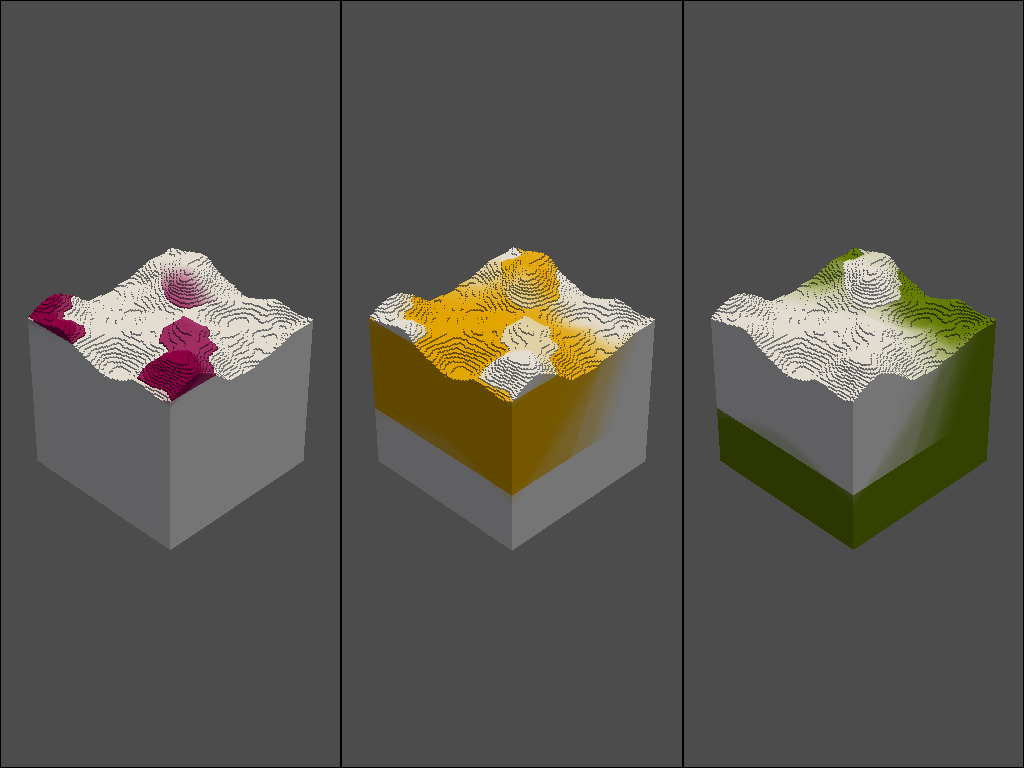

In [14]:
file0 ='vtk/prob0_lith_block.vtr'
cmap0 = mcolors.LinearSegmentedColormap.from_list('c',['#FFFFFF',geo_model.surfaces.df['color'][1]])
file1 ='vtk/prob1_lith_block.vtr'
cmap1 = mcolors.LinearSegmentedColormap.from_list('c',['#FFFFFF',geo_model.surfaces.df['color'][0]])
file2 ='vtk/prob2_lith_block.vtr'
cmap2 = mcolors.LinearSegmentedColormap.from_list('c',['#FFFFFF',geo_model.surfaces.df['color'][3]])


p = pv.Plotter(shape=(1,3))
p.subplot(0,0)
grid0 = pv.read(file0)
masktopo0 = grid0.threshold(0)
p.add_mesh(masktopo0, cmap=cmap0, show_scalar_bar=False)
p.subplot(0,1)
grid1 = pv.read(file1)
masktopo1 = grid1.threshold(0)
p.add_mesh(masktopo1, cmap=cmap1, show_scalar_bar=False)
p.subplot(0,2)
grid2 = pv.read(file2)
masktopo2 = grid2.threshold(0)
p.add_mesh(masktopo2, cmap=cmap2, show_scalar_bar=False)


#p.add_mesh(masktopo, cmap=cmap0, show_scalar_bar=False, specular=0.5)
#pv.set_plot_theme('document')
p.show(auto_close=False)

In [7]:
masktopo0.

UnstructuredGrid (0x28200552288)
  N Cells:	887022
  N Points:	917742
  X Bounds:	0.000e+00, 1.000e+03
  Y Bounds:	0.000e+00, 1.000e+03
  Z Bounds:	0.000e+00, 1.000e+03
  N Arrays:	1

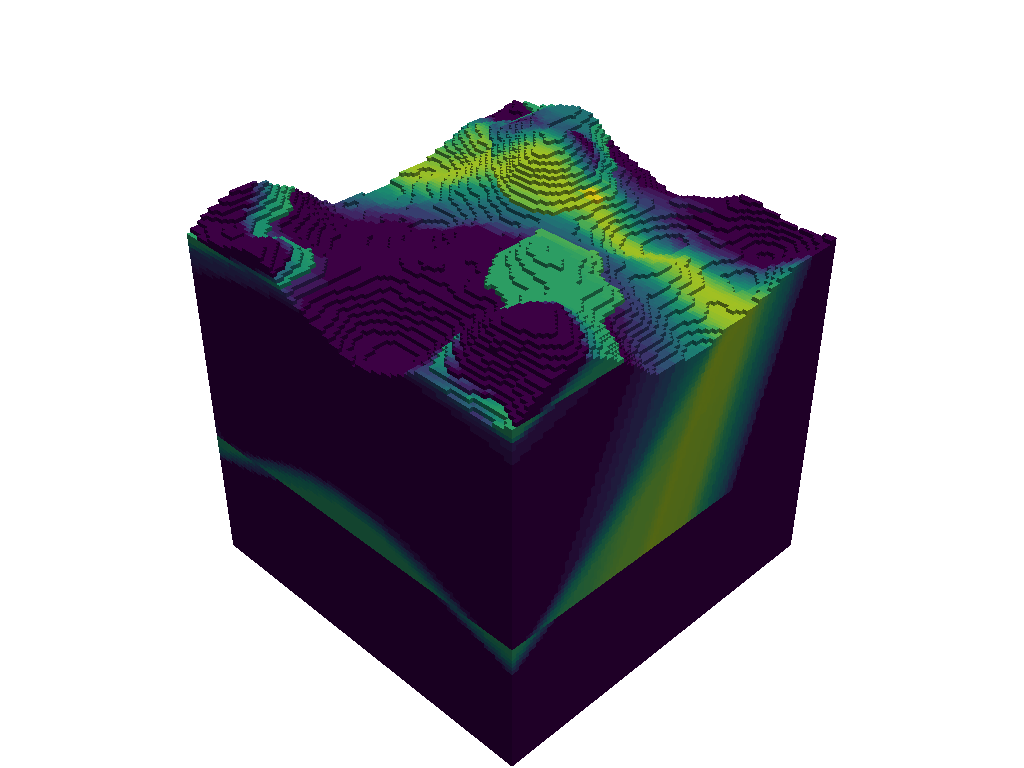

In [10]:
file_ie ='vtk/block_ie_lith_block.vtr'
p2 = pv.Plotter()
gridie = pv.read(file_ie)
masktopoie = gridie.threshold(0)
p2.add_mesh(masktopoie, cmap='viridis', show_scalar_bar=False)
p2.show(auto_close=False)

### Orientations

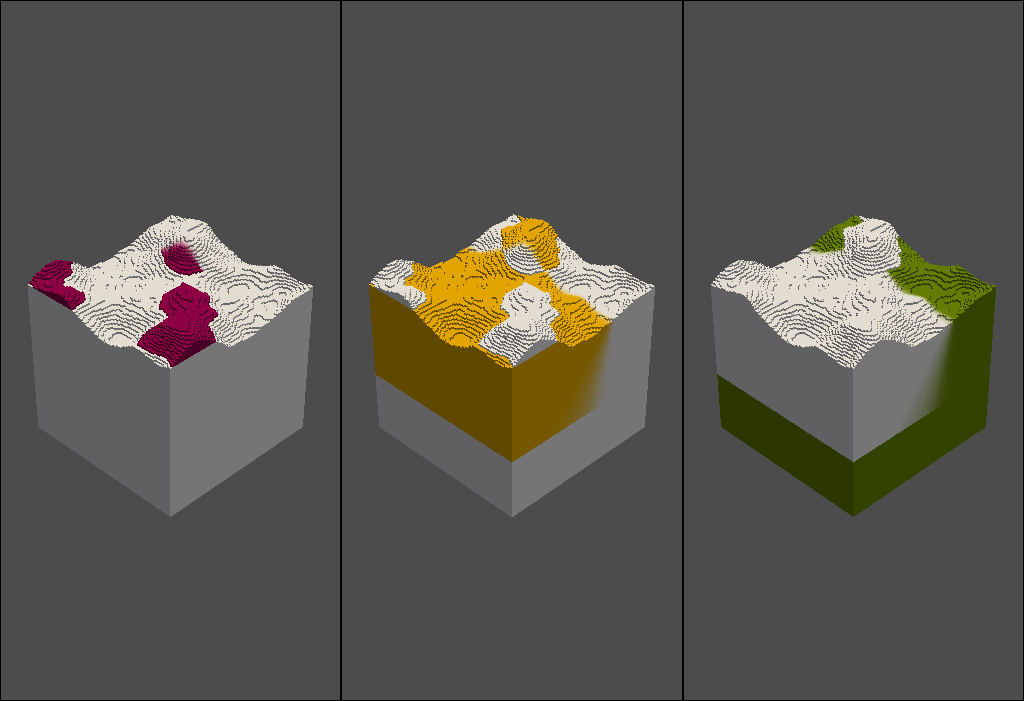

In [66]:
file0 ='prob0_or_lith_block.vtr'
cmap0 = mcolors.LinearSegmentedColormap.from_list('c',['#FFFFFF',geo_model.surfaces.df['color'][1]])
file1 ='prob1_or_lith_block.vtr'
cmap1 = mcolors.LinearSegmentedColormap.from_list('c',['#FFFFFF',geo_model.surfaces.df['color'][0]])
file2 ='prob2_or_lith_block.vtr'
cmap2 = mcolors.LinearSegmentedColormap.from_list('c',['#FFFFFF',geo_model.surfaces.df['color'][3]])


p3 = pv.Plotter(shape=(1,3))
p3.subplot(0,0)
grid0 = pv.read(file0)
masktopo0 = grid0.threshold(0)
p3.add_mesh(masktopo0, cmap=cmap0, show_scalar_bar=False)
p3.subplot(0,1)
grid1 = pv.read(file1)
masktopo1 = grid1.threshold(0)
p3.add_mesh(masktopo1, cmap=cmap1, show_scalar_bar=False)
p3.subplot(0,2)
grid2 = pv.read(file2)
masktopo2 = grid2.threshold(0)
p3.add_mesh(masktopo2, cmap=cmap2, show_scalar_bar=False)

p3.show(auto_close=False)

In [37]:
file_ie ='block_ie_or_lith_block.vtr'
p4 = pv.Plotter()
gridie = pv.read(file_ie)
masktopoie = gridie.threshold(0)
p4.add_mesh(masktopoie, cmap='viridis', show_scalar_bar=False)
p4.show(auto_close=False)

OSError: File (C:\Users\elisa\Documents\git\gempy_stochsim_uncertainty\block_ie_or_lith_block.vtr) not found

In [7]:
file0 ='vtk/prob0_lith_block.vtr'
cmap0 = mcolors.LinearSegmentedColormap.from_list('c',['#FFFFFF',geo_model.surfaces.df['color'][1]])
file1 ='vtk/prob1_lith_block.vtr'
cmap1 = mcolors.LinearSegmentedColormap.from_list('c',['#FFFFFF',geo_model.surfaces.df['color'][0]])
file2 ='vtk/prob2_lith_block.vtr'
cmap2 = mcolors.LinearSegmentedColormap.from_list('c',['#FFFFFF',geo_model.surfaces.df['color'][3]])

In [16]:
pv.set_plot_theme('document')
p = pv.Plotter()
grid0 = pv.read(file0)
masktopo0 = grid0.threshold(0)
grid1 = pv.read(file1)
masktopo1 = grid1.threshold(0)
grid2 = pv.read(file2)
masktopo2 = grid2.threshold(0)
a = 3000
R = 1 / np.sqrt(3) * a

masktopo0.points[:,0] += -500
masktopo0.points[:,1] += R -500
masktopo1.points[:,0] += R*np.cos(np.deg2rad(-30)) -500
masktopo1.points[:,1] += R*np.sin(np.deg2rad(-30)) -500
masktopo2.points[:,0] += R*np.cos(np.deg2rad(210))-500
masktopo2.points[:,1] += R*np.sin(np.deg2rad(210))-500
p.add_mesh(masktopo0, cmap=cmap0, show_scalar_bar=False)
p.add_mesh(masktopo1, cmap=cmap1, show_scalar_bar=False)
p.add_mesh(masktopo2, cmap=cmap2, show_scalar_bar=False)
#p.show()

(vtkRenderingOpenGL2Python.vtkOpenGLActor)000001B900455408

In [17]:
print(p.camera_position)
p.camera_position = [(5000,5000,5000), (0,0,0), (0,0,1)]
nSteps = 50
d = R/nSteps
dx0 = 0
dy0 = -d
dx1 = -d*np.cos(np.deg2rad(-30))
dy1 = -d*np.sin(np.deg2rad(-30))
dx2 = -d*np.cos(np.deg2rad(210))
dy2 = -d*np.sin(np.deg2rad(210))
p.open_gif('probtest4.gif')
#p.open_movie('probtest.mp4')
for i in range(nSteps):
    #masktopo0 = masktopo0.threshold(0 + i*(0.01))
    #masktopo1 = masktopo1.threshold(0 + i*(0.01))
    #masktopo2 = masktopo2.threshold(0 + i*(0.01))
    #masktopo0.points[:,0] += dx0
    masktopo0.points[:,1] += dy0
    masktopo1.points[:,0] += dx1
    masktopo1.points[:,1] += dy1
    masktopo2.points[:,0] += dx2
    masktopo2.points[:,1] += dy2
    #p.clear()
    #p.add_mesh(masktopo0, cmap=cmap0, show_scalar_bar=False)
    #p.add_mesh(masktopo1, cmap=cmap1, show_scalar_bar=False)
    #p.add_mesh(masktopo2, cmap=cmap2, show_scalar_bar=False)
    p.update_coordinates(masktopo0.points, masktopo0)
    p.update_coordinates(masktopo1.points, masktopo1)
    p.update_coordinates(masktopo2.points, masktopo2)
    if i == nSteps-1:
        p.clear()
        p.add_mesh(masktopoie, cmap='viridis', show_scalar_bar=False)
        p.update_coordinates(masktopo0.points, masktopoie)
    p.write_frame()

# Close movie and delete object
p.close()
#p.update_coordinates(masktopo1.points)
#p.update_coordinates(masktopo2.points)
#p.update_coordinates(masktopo0.points)

#p.add_mesh(masktopo, cmap=cmap0, show_scalar_bar=False, specular=0.5)
#pv.set_plot_theme('document')
#p.show(auto_close=False)

[(0.0, 433.0126953125, 11071.686775179129), (0.0, 433.0126953125, 500.0), (0.0, 1.0, 0.0)]


In [36]:
p.write_frame

In [29]:
masktopo0.cell_arrays

{'Lithology': array([0.11, 0.12, 0.15, ..., 1.  , 1.  , 1.  ])}

AttributeError: 'Plotter' object has no attribute 'cell_arrays'